# Hồi quy tuyến tính (Linear Regression)

Cài đặt mô hình hồi quy tuyến tính với thư viện PyTorch

In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

In [16]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [17]:
# Xây dựng dữ liệu
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [18]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

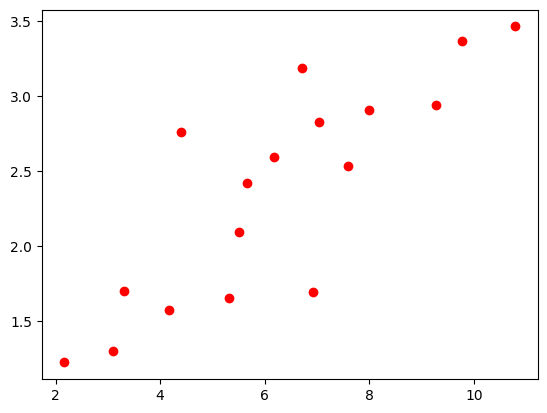

In [19]:
# Trực quan hóa dữ liệu
plt.plot(X, Y, 'ro', label='Original data')
plt.show()

In [20]:
# Xây dựng hàm hồi quy (Wx + b).
def model(x):
    return x * w + b

In [21]:
# Khởi tạo giá trị trọng số W và bias
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [22]:
# Xây dựng hàm mất mát (loss function)
# Đọc thêm về reduce_mean tại: https://docs.w3cub.com/tensorflow~python/tf/reduce_mean

# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [23]:
# Huấn luyện mô hình với training_steps đã được xác định từ trước
losses = []
for i in range(training_steps):
    preds = model(inputs)
    loss = mse(preds, targets)
    losses.append(loss)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * learning_rate
        b -= b.grad * learning_rate
        w.grad.zero_()
        b.grad.zero_()

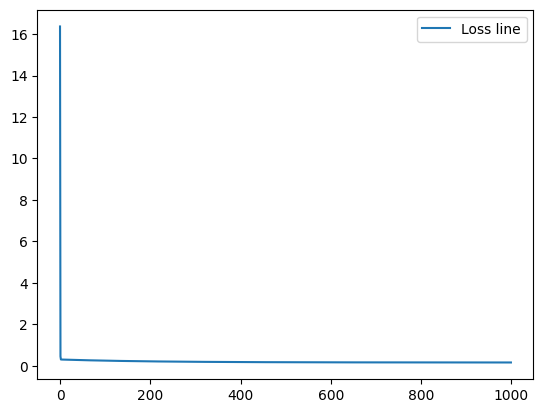

In [30]:
# Biểu đồ biểu diễn độ biến thiên của hàm mất mát qua các vòng lặp
plt.plot([i for i in range(len(losses))], 
         [loss.detach().numpy() if isinstance(loss, torch.Tensor) else loss for loss in losses], 
         label='Loss line')
plt.legend()
plt.show()

In [31]:
import matplotlib.pyplot as plt

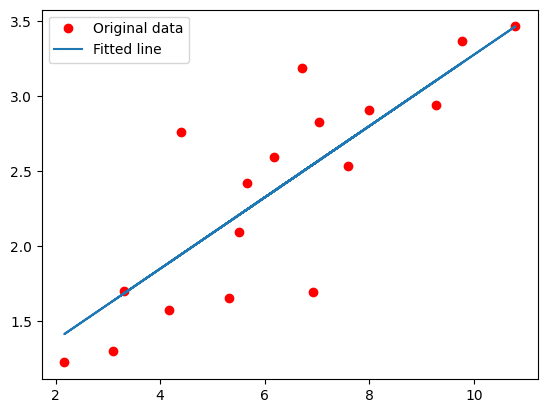

In [33]:
# Mô hình hóa sự tương quan giữa những điểm dữ liệu và phương trình tuyến tính
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, (w * inputs + b).detach().numpy(), label='Fitted line')
plt.legend()
plt.show()